 #  **Analysing Diversified Energy Stocks Portfolio Data**
 ---
### This Portafolio include 3 stocks with the best cumulate return from the portfolios Alternative Renewable Energy and Traditional Energy Stoks.

In [68]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import csv


from matplotlib import pyplot as plt
%matplotlib inline

### Stocks Trad_Energy

In [69]:
Div_Energy = Path("../../Data/Diversified.csv")
Diversified_df = pd.read_csv(Div_Energy)

Diversified_df.dropna().head(10) 

,Symbol,Description,Exchange,Sector,Industry,Last Trade,% Change,Volume,Market Cap (B),Market_Cap_W,Dividend Yield,Divid_Yield_W,10 Years Return,Stock_Ret_W,iqual weighted
0,BAM,Brookfield Asset Mgm F,NYSE,Financials,Asset Management & Custody Banks,43.45,-0.82,1896145.00,66.12,0.17,1.20,0.06,4.09,0.20,0.17
1,COP,Conocophillips,NYSE,Energy,"Oil, Gas & Consumable Fuels",48.40,1.53,"8,502,536",66.05,0.17,3.55,0.19,1.62,0.08,0.17
2,ETN,Eaton Corp Plc F,NYSE,Industrials,Electrical Components & Equipment,127.69,2.08,2662222.00,50.04,0.13,2.29,0.12,2.95,0.15,0.17
3,NEE,Nextera Energy Inc,NYSE,Utilities,Electric Utilities,78.20,-3.26,9660915.00,159.12,0.41,1.79,0.10,4.55,0.23,0.17
4,OKE,Oneok Inc,NYSE,Energy,"Oil, Gas & Consumable Fuels",45.50,2.14,"2,050,428",20.42,0.05,8.22,0.44,3.79,0.19,0.17
5,PXD,Pioneer Natural Res,NYSE,Energy,"Oil, Gas & Consumable Fuels",133.94,0.70,"2,257,083",29.48,0.08,1.67,0.09,2.97,0.15,0.17
6,SPY,Spdr S&P 500,NYSE ARCA,--,--,390.03,-0.18,"83,240,971",340.71,1.00,1.46,1.00,2.84,1.00,1.00


### Weight Distribution

In [71]:
# Create Scenaries DataFrame

# Set the tickers
Div_Stocks = ['BAM', 'COP', 'ETN', 'NEE', 'OKE', 'PXD']


# Set current amount of shares data
Div_iqual_Dist = {
    "Div_iqual_Dist": [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]}

Div_Market_Cap_Dist = {
    "Div_Market_Cap_Dist": [0.17, 0.17, 0.13, 0.41, 0.05, 0.08]}

Div_Divid_Yield_Dist = {
    "Div_Divid_Yield_Dist": [0.06, 0.19, 0.12, 0.10, 0.44, 0.09]}

Div_Ten_Years_Return_Dist = {
    "Div_Ten_Years_Return_Dist": [0.20, 0.08, 0.15, 0.23, 0.19, 0.15]}


# Create the shares DataFrame
df_Div_iqual = pd.DataFrame(Div_iqual_Dist, index=Div_Stocks)
df_Div_MC = pd.DataFrame(Div_Market_Cap_Dist, index=Div_Stocks)
df_Div_DY = pd.DataFrame(Div_Divid_Yield_Dist, index=Div_Stocks)
df_Div_Ret = pd.DataFrame(Div_Ten_Years_Return_Dist, index=Div_Stocks)
   

**# Data Cleaning**

In [72]:
# Reading .csv returns
PATH3 = Path('../../Data/Diversified_e.csv')
Diver = pd.read_csv(PATH3, index_col="Date", infer_datetime_format=True, parse_dates=True)
#ALTERNATIVE_RE = ALTERNATIVE_RE.set_index('Date')
Diver.head()


,BAM,COP,ETN,NEE,OKE,PXD
Date,,,,,,
2010-01-04,9.43,40.08,32.16,13.31,19.95,50.98
2010-01-05,9.58,40.12,31.97,13.18,19.78,51.00
2010-01-06,9.48,40.41,31.83,13.31,19.89,51.89
2010-01-07,9.50,40.25,32.30,13.28,19.76,52.35
2010-01-08,9.55,40.60,33.03,13.16,19.87,53.25


In [73]:
# Checking file information:
Diver.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BAM     2516 non-null   float64
 1   COP     2516 non-null   float64
 2   ETN     2516 non-null   float64
 3   NEE     2516 non-null   float64
 4   OKE     2516 non-null   float64
 5   PXD     2516 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


In [74]:
# Count nulls
Diver.isnull().sum()

BAM    0
COP    0
ETN    0
NEE    0
OKE    0
PXD    0
dtype: int64

In [75]:
# Drop nulls
Diver = Diver.dropna()

In [76]:
# Validating all nulls have been dropped
Diver.isnull().sum()

BAM    0
COP    0
ETN    0
NEE    0
OKE    0
PXD    0
dtype: int64

In [77]:
Diver.head()

,BAM,COP,ETN,NEE,OKE,PXD
Date,,,,,,
2010-01-04,9.43,40.08,32.16,13.31,19.95,50.98
2010-01-05,9.58,40.12,31.97,13.18,19.78,51.00
2010-01-06,9.48,40.41,31.83,13.31,19.89,51.89
2010-01-07,9.50,40.25,32.30,13.28,19.76,52.35
2010-01-08,9.55,40.60,33.03,13.16,19.87,53.25


In [78]:
Diver_returned = Diver.pct_change()
Diver_return =Diver_returned.dropna()
Diver_return.head()

,BAM,COP,ETN,NEE,OKE,PXD
Date,,,,,,
2010-01-05,0.015907,0.000998,-0.005908,-0.009767,-0.008521,0.000392
2010-01-06,-0.010438,0.007228,-0.004379,0.009863,0.005561,0.017451
2010-01-07,0.002110,-0.003959,0.014766,-0.002254,-0.006536,0.008865
2010-01-08,0.005263,0.008696,0.022601,-0.009036,0.005567,0.017192
2010-01-11,-0.013613,0.005911,0.045413,-0.000760,0.022144,-0.018216


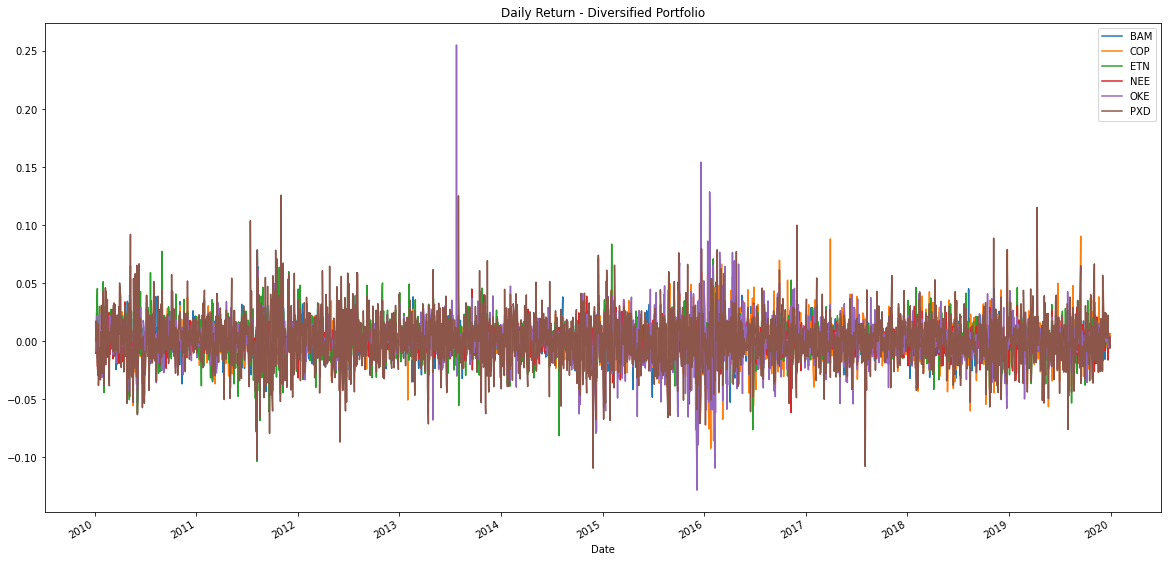

In [79]:
Diver_return.plot(figsize=(20,10), title = "Daily Return - Diversified Portfolio");

In [80]:
# Cumulative Return
Diver_cum_return = (1 + Diver_return).cumprod()
Diver_cum_return.tail()

,BAM,COP,ETN,NEE,OKE,PXD
Date,,,,,,
2019-12-24,4.074231,1.613523,2.937811,4.517656,3.789474,2.977638
2019-12-26,4.095440,1.621756,2.955224,4.544703,3.816040,2.983131
2019-12-27,4.106045,1.621257,2.953669,4.555222,3.794987,2.977246
2019-12-30,4.088017,1.612026,2.951803,4.531931,3.780451,2.959396
2019-12-31,4.085896,1.622505,2.945274,4.548460,3.792982,2.969204


In [81]:
Diver_cum_return.sum()

BAM    5447.058324
COP    3560.500998
ETN    4931.016791
NEE    5126.681443
OKE    5792.641103
PXD    6810.097097
dtype: float64

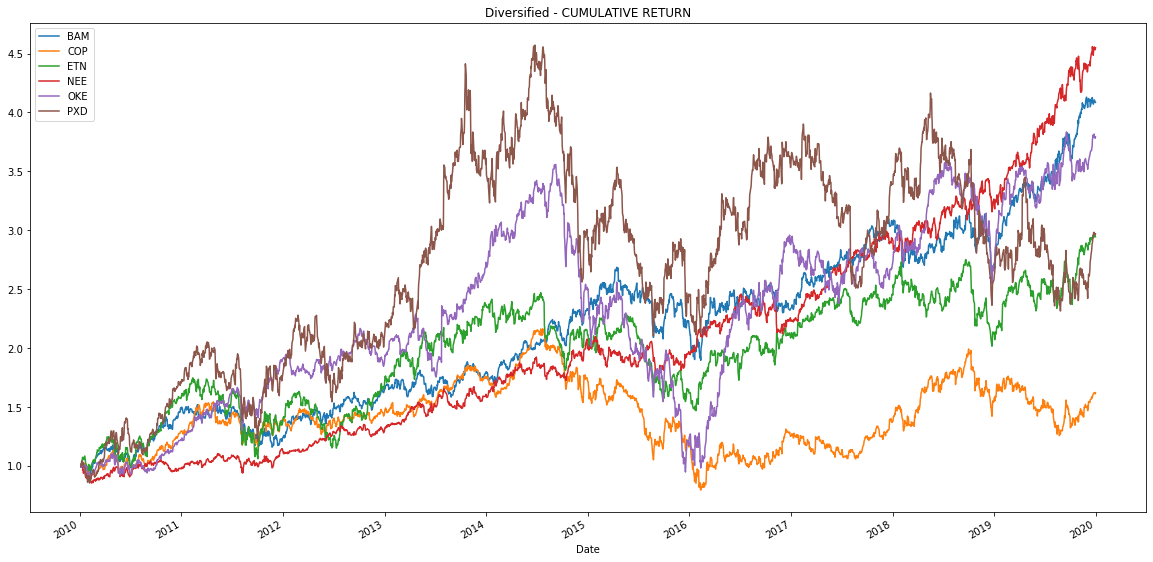

In [82]:
Diver_cum_return.plot(figsize=(20,10), title = "Diversified Portfolio- CUMULATIVE RETURN");

## **S&P 500 Returns**

**Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.**

In [83]:
# Reading S&P 500 Closing Prices
spy = Path("../../Data/SPY_close.csv")
spy = pd.read_csv(spy, index_col="Date", infer_datetime_format=True, parse_dates=True)

spy.head()

,SPY
Date,
2010-01-04,113.33
2010-01-05,113.63
2010-01-06,113.71
2010-01-07,114.19
2010-01-08,114.57


In [84]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [85]:
# Fix Data Typesaa
spy['SPY'] = spy['SPY'].astype('float')
spy['SPY'].dtype

dtype('float64')

In [86]:
# Calculate Daily Returns
spy_return = spy.pct_change()
spy_return.head()

,SPY
Date,
2010-01-04,NaN
2010-01-05,0.002647
2010-01-06,0.000704
2010-01-07,0.004221
2010-01-08,0.003328


In [87]:
# Drop nulls
spy_return = spy_return.dropna()

In [88]:
# Checking file information:
spy_return.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2010-01-05 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     2515 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


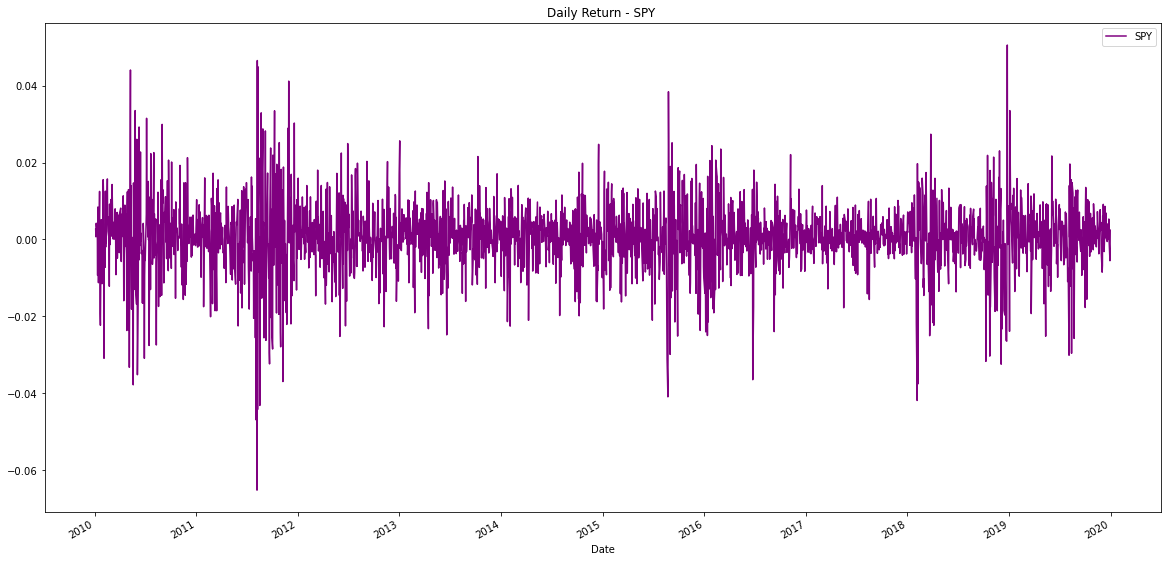

In [89]:
spy_return.plot(figsize=(20,10), title = "Daily Return - SPY ", color= 'purple');

In [90]:
# Cumulative Return
spy_cum_return = (1 + spy_return).cumprod()
spy_cum_return.tail()

,SPY
Date,
2019-12-24,2.834466
2019-12-26,2.849554
2019-12-27,2.848848
2019-12-30,2.833142
2019-12-31,2.840025


In [91]:
spy_cum_return.sum()

SPY    4356.110915
dtype: float64

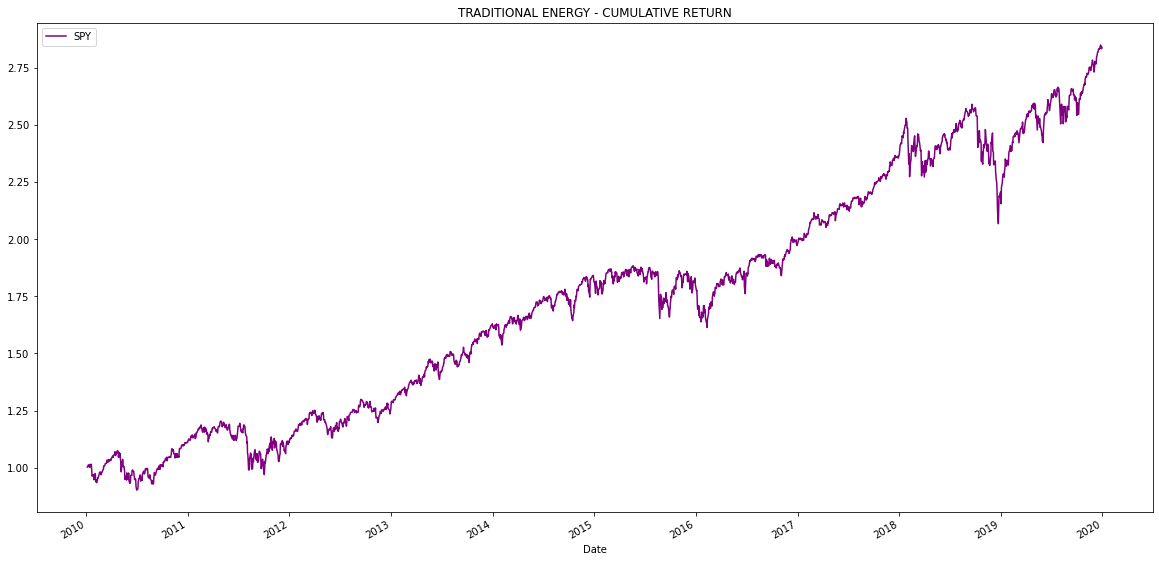

In [92]:
spy_cum_return.plot(figsize=(20,10), title = "S&P500- CUMULATIVE RETURN", color = 'purple');

# Portfolio Analysis

### Setting Porfotlios different Weights

,Div_iqual_Dist
BAM,0.166667
COP,0.166667
ETN,0.166667
NEE,0.166667
OKE,0.166667
PXD,0.166667


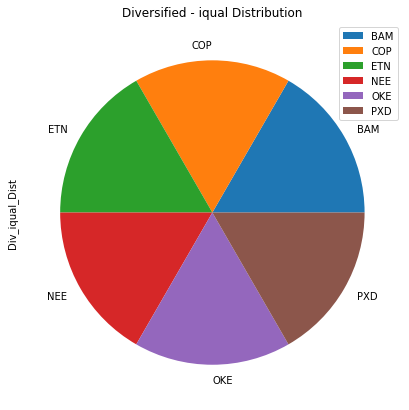

In [96]:
# Display savings DataFrame
display(df_Div_iqual)
# Plot savings pie chart
df_Div_iqual.plot.pie(y="Div_iqual_Dist", title="Diversified - iqual Distribution", figsize=(7, 7));

In [98]:
# Set weights
weights = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# Calculate portfolio return
PORT_Div_EqualyWeighted = Diver_return.dot(weights)

# Display sample data

 
PORT_Div_EqualyWeighted.head()

Date
2010-01-05   -0.001150
2010-01-06    0.004214
2010-01-07    0.002165
2010-01-08    0.008380
2010-01-11    0.006813
dtype: float64

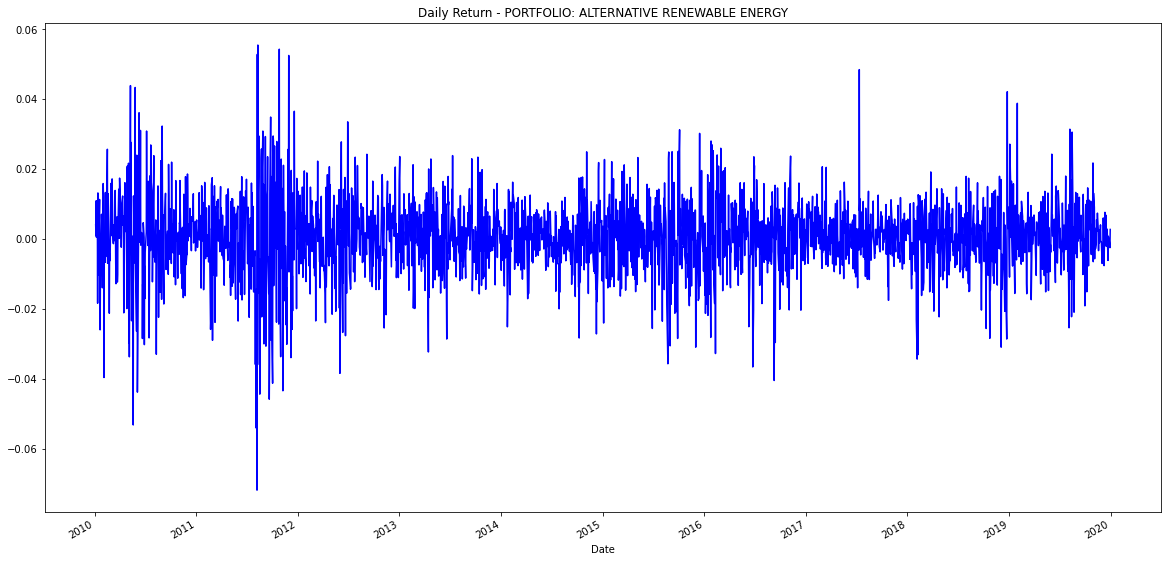

In [27]:
PORT_Div_EqualyWeighted.plot(figsize=(20,10), title = "Daily Return - PORTFOLIO: Diversified ENERGY", color= 'blue');

,Div_Market_Cap_Dist
BAM,0.17
COP,0.17
ETN,0.13
NEE,0.41
OKE,0.05
PXD,0.08


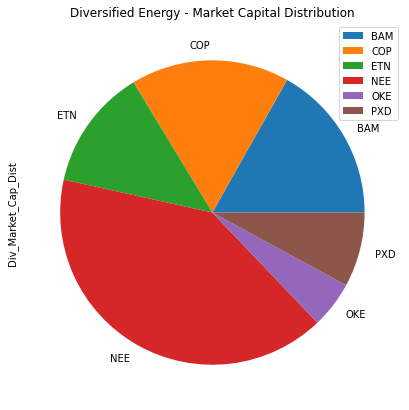

In [100]:
# Display savings DataFrame
display(df_Div_MC)
# Plot savings pie chart
df_Div_MC.plot.pie(y="Div_Market_Cap_Dist", title="Diversified Energy - Market Capital Distribution", figsize=(7,7));

In [102]:
# Set weight by Market Capital
weights = [0.17, 0.17, 0.13, 0.41, 0.05, 0.08]

# Calculate portfolio return
PORT_Div_M_Cap_Weighted = Diver_return.dot(weights)

# Display sample data

 
PORT_Div_M_Cap_Weighted.head()

Date
2010-01-05   -0.002293
2010-01-06    0.004603
2010-01-07    0.001063
2010-01-08    0.003260
2010-01-11    0.003933
dtype: float64

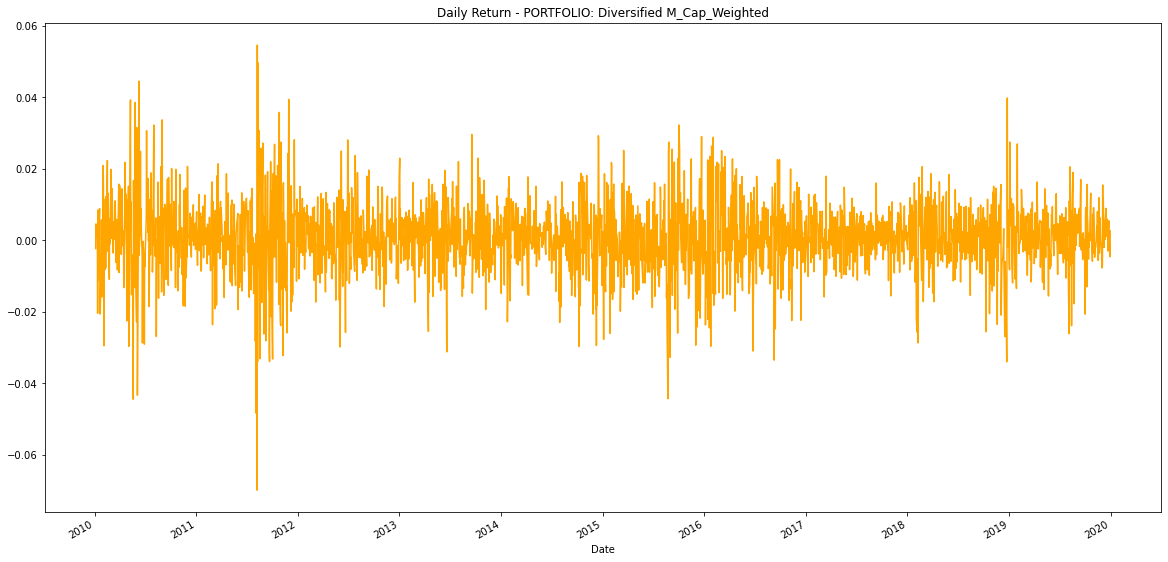

In [103]:
PORT_Div_M_Cap_Weighted.plot(figsize=(20,10), title = "Daily Return - PORTFOLIO: Diversified M_Cap_Weighted", color='orange');

,Div_Divid_Yield_Dist
BAM,0.06
COP,0.19
ETN,0.12
NEE,0.10
OKE,0.44
PXD,0.09


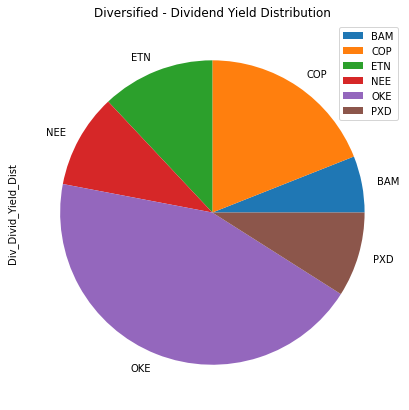

In [104]:
# Display savings DataFrame
display(df_Div_DY)
# Plot savings pie chart
df_Div_DY.plot.pie(y="Div_Divid_Yield_Dist", title="Diversified - Dividend Yield Distribution", figsize=(7, 7));

In [105]:
# Set weight by Dividend Yield
weights = [0.06, 0.19, 0.12, 0.10, 0.44, 0.09]

# Calculate portfolio return
PORT_Div_Dividend_Weighted = Diver_return.dot(weights)

# Display sample data

 
PORT_Div_Dividend_Weighted.head()

Date
2010-01-05   -0.004256
2010-01-06    0.005225
2010-01-07   -0.001157
2010-01-08    0.007773
2010-01-11    0.013784
dtype: float64

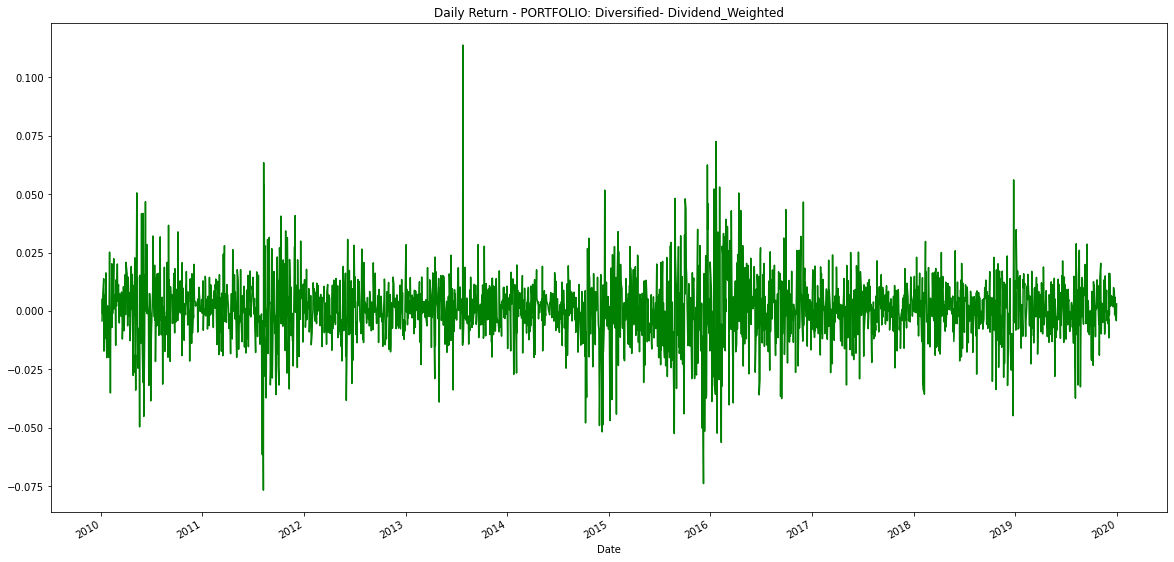

In [106]:
PORT_Div_Dividend_Weighted.plot(figsize=(20,10), title = "Daily Return - PORTFOLIO: Diversified- Dividend_Weighted", color='green');

,Div_Ten_Years_Return_Dist
BAM,0.20
COP,0.08
ETN,0.15
NEE,0.23
OKE,0.19
PXD,0.15


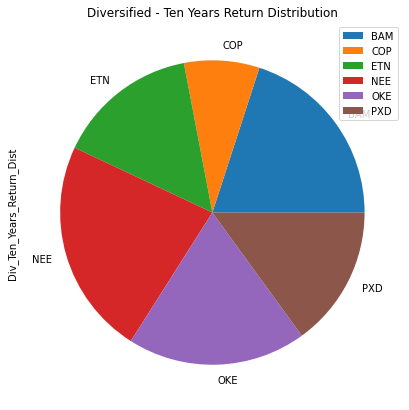

In [108]:
# Display savings DataFrame
display(df_Div_Ret)
# Plot savings pie chart
df_Div_Ret.plot.pie(y="Div_Ten_Years_Return_Dist", title="Diversified - Ten Years Return Distribution" , figsize=(7, 7));

In [112]:
# Set weight by 10 Years Return
weights = [0.20, 0.08, 0.15, 0.23, 0.19, 0.15]

# Calculate portfolio return
PORT_Div_10Y_return_Weighted = Diver_return.dot(weights)

# Display sample data

 
PORT_Div_10Y_return_Weighted.head()

Date
2010-01-05   -0.001432
2010-01-06    0.003777
2010-01-07    0.001890
2010-01-08    0.006697
2010-01-11    0.005863
dtype: float64

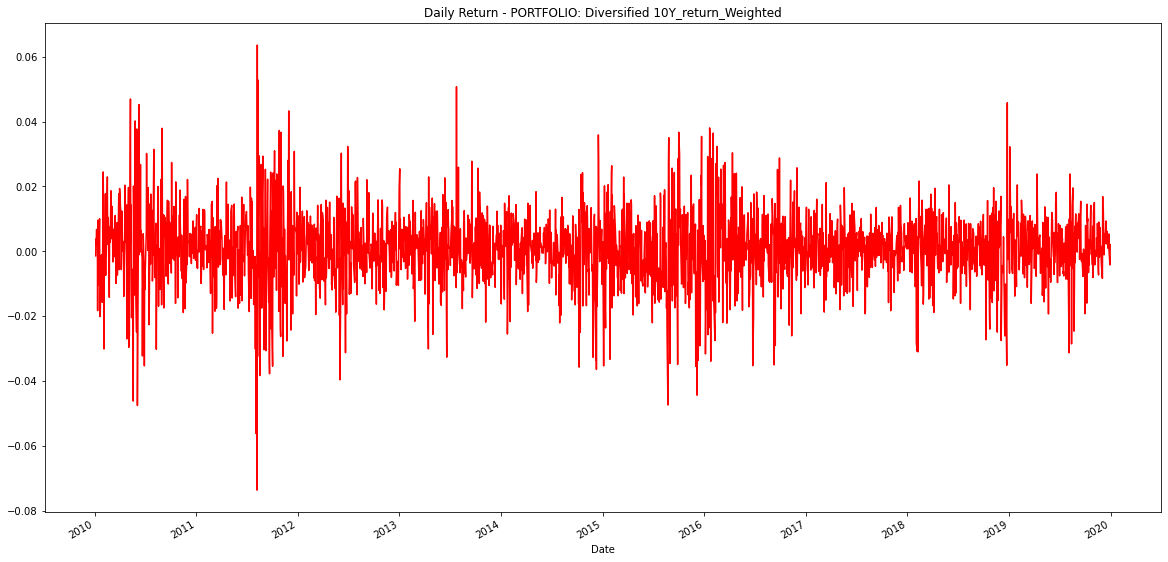

In [113]:
PORT_Div_10Y_return_Weighted.plot(figsize=(20,10), title = "Daily Return - PORTFOLIO: Diversified 10Y_return_Weighted", color='red');

## **COMBINING ALTERNATIVE RE PORTFOLIOS  AND SPY Returns**

In [115]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_div = pd.concat([PORT_Div_EqualyWeighted, PORT_Div_M_Cap_Weighted, PORT_Div_Dividend_Weighted, PORT_Div_10Y_return_Weighted, spy_return], axis="columns", join="inner")

combined_div.columns = ['PORT_Div_EqualyWeighted', 'PORT_Div_M_Cap_Weighted', 'PORT_Div_Dividend_Weighted', 'PORT_Div_10Y_return_Weighted', 'SPY']
combined_div.head()

,PORT_Div_EqualyWeighted,PORT_Div_M_Cap_Weighted,PORT_Div_Dividend_Weighted,PORT_Div_10Y_return_Weighted,SPY
Date,,,,,
2010-01-05,-0.001150,-0.002293,-0.004256,-0.001432,0.002647
2010-01-06,0.004214,0.004603,0.005225,0.003777,0.000704
2010-01-07,0.002165,0.001063,-0.001157,0.001890,0.004221
2010-01-08,0.008380,0.003260,0.007773,0.006697,0.003328
2010-01-11,0.006813,0.003933,0.013784,0.005863,0.001397


---

# **Conduct Quantitative Analysis**

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## **Performance Anlysis**

#### **Calculate and Plot the daily returns.**

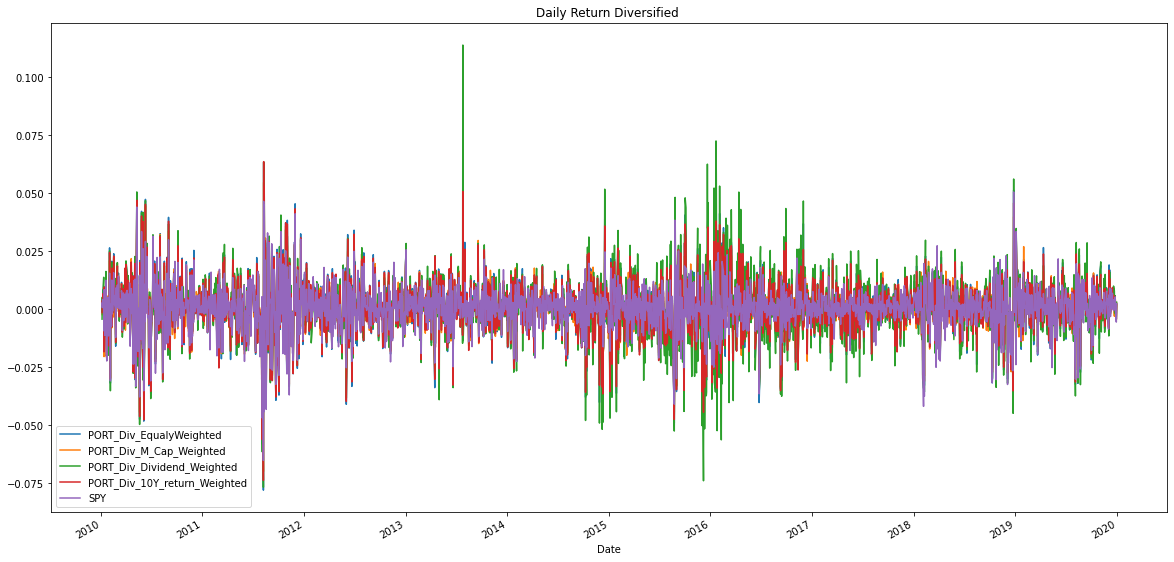

In [118]:
# Plot daily returns of all portfolios
combined_div.plot(figsize=(20,10), title = "Daily Return Diversified ").legend(loc='lower left');

#### **Calculate and Plot cumulative returns.**

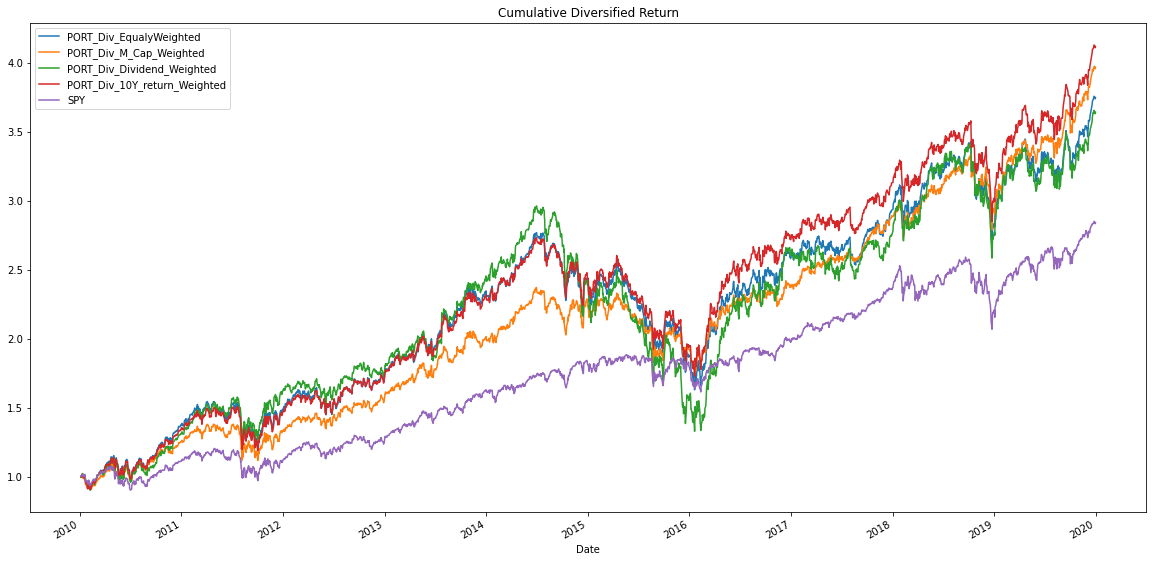

In [119]:
# Calculate cumulative returns of all portfolios
#cumulative_returns = (1 + daily_returns).cumprod()
#cumulative_returns.head()
# Plot cumulative returns
cumulative_div_returns = (1 + combined_div).cumprod()
cumulative_div_returns.plot(figsize=(20,10), title = "Cumulative Diversified Return");

In [121]:
cumulative_div_returns.tail()

,PORT_Div_EqualyWeighted,PORT_Div_M_Cap_Weighted,PORT_Div_Dividend_Weighted,PORT_Div_10Y_return_Weighted,SPY
Date,,,,,
2019-12-24,3.737023,3.948863,3.632639,4.105788,2.834466
2019-12-26,3.756379,3.970486,3.653863,4.127648,2.849554
2019-12-27,3.754239,3.973800,3.645314,4.126007,2.848848
2019-12-30,3.738186,3.955664,3.630159,4.108548,2.833142
2019-12-31,3.746937,3.966168,3.641267,4.116972,2.840025


### Cumulative Return Plot: In this graph we can see portfolios Algo_1 and BH_Inc have cumulative returns bigger than S&P 500, being Algo_1 the one with the Highest cumulative return over all, and P_G_Co_Inc the portfolio with the lowest cumulative return over all.

---

## **Risk Analysis**

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### **Create a box plot for each portfolio**


SPY                             0.000458
PORT_Div_M_Cap_Weighted         0.000599
PORT_Div_EqualyWeighted         0.000600
PORT_Div_Dividend_Weighted      0.000610
PORT_Div_10Y_return_Weighted    0.000629
dtype: float64

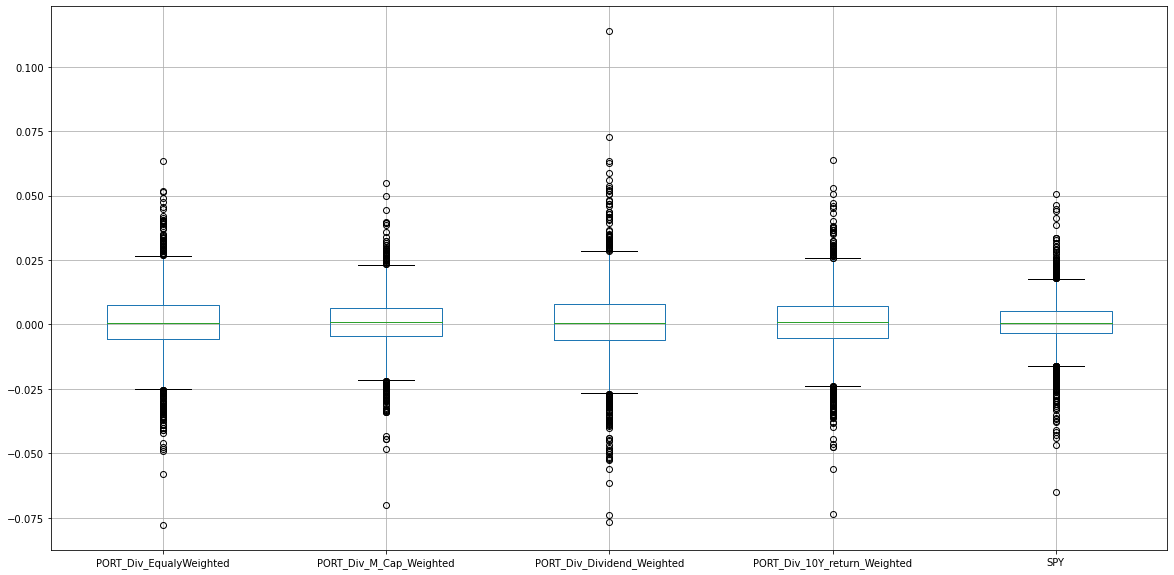

In [122]:
# Box plot to visually show risk

combined_div.boxplot(figsize=(20,10));
combined_div.mean().sort_values()

### **Calculate Standard Deviations**


In [123]:
# Calculate the daily standard deviations of all portfolios
#from daily_returns
combined_div.dropna().head()

,PORT_Div_EqualyWeighted,PORT_Div_M_Cap_Weighted,PORT_Div_Dividend_Weighted,PORT_Div_10Y_return_Weighted,SPY
Date,,,,,
2010-01-05,-0.001150,-0.002293,-0.004256,-0.001432,0.002647
2010-01-06,0.004214,0.004603,0.005225,0.003777,0.000704
2010-01-07,0.002165,0.001063,-0.001157,0.001890,0.004221
2010-01-08,0.008380,0.003260,0.007773,0.006697,0.003328
2010-01-11,0.006813,0.003933,0.013784,0.005863,0.001397


In [125]:
#Standar daily deviation
daily_div_std = combined_div.std().sort_values()  
daily_div_std 

SPY                             0.009275
PORT_Div_M_Cap_Weighted         0.010076
PORT_Div_10Y_return_Weighted    0.011473
PORT_Div_EqualyWeighted         0.012173
PORT_Div_Dividend_Weighted      0.013829
dtype: float64

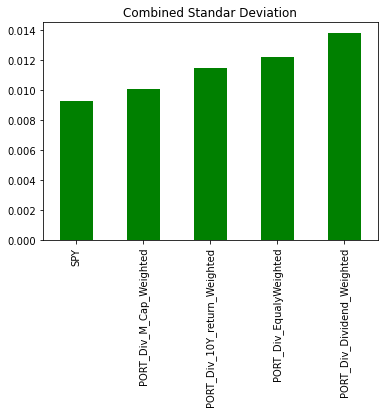

In [127]:
daily_div_std.plot(kind="bar", title="Combined Standar Deviation", color='green');

### **Determine which portfolios are riskier than the S&P 500**

In [128]:
# Calculate  the daily standard deviation of S&P 500
spy_std = combined_div['SPY'].std()
print("S&P500 Daily Standar Deviation = ", spy_std)

S&P500 Daily Standar Deviation =  0.009275049495769192


In [129]:
combined_div.std() > spy_std

PORT_Div_EqualyWeighted          True
PORT_Div_M_Cap_Weighted          True
PORT_Div_Dividend_Weighted       True
PORT_Div_10Y_return_Weighted     True
SPY                             False
dtype: bool

### **Calculate the Annualized Standard Deviation**

In [130]:
# Calculate the annualized standard deviation (252 trading days)
annualized_div_std = (daily_div_std * np.sqrt(252)).sort_values()
annualized_div_std.head(12)

SPY                             0.147237
PORT_Div_M_Cap_Weighted         0.159955
PORT_Div_10Y_return_Weighted    0.182133
PORT_Div_EqualyWeighted         0.193238
PORT_Div_Dividend_Weighted      0.219536
dtype: float64

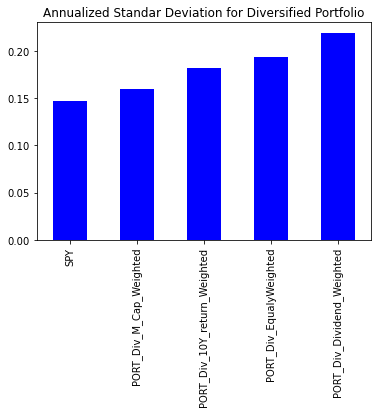

In [133]:
annualized_div_std.plot(kind="bar", title="Annualized Standar Deviation for Diversified Portfolio", color= 'blue');

---

## **Rolling Statistics**

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### **Calculate and plot rolling `std` for all portfolios with 21-day window**

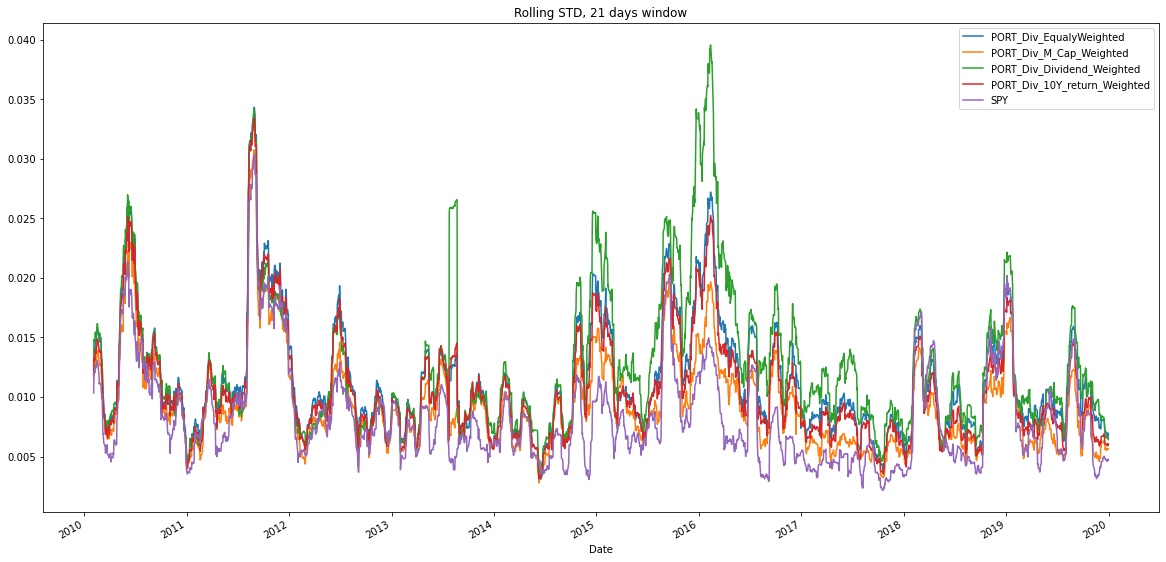

In [134]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

combined_div.rolling(window=21).std().plot(figsize=(20,10), title = "Rolling STD, 21 days window");

#### **Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500**


In [135]:
# Calculate the correlation
# Display de correlation matrix

correlation_diver= combined_div.corr()
correlation_diver

,PORT_Div_EqualyWeighted,PORT_Div_M_Cap_Weighted,PORT_Div_Dividend_Weighted,PORT_Div_10Y_return_Weighted,SPY
PORT_Div_EqualyWeighted,1.000000,0.953679,0.951999,0.992597,0.822844
PORT_Div_M_Cap_Weighted,0.953679,1.000000,0.870027,0.964694,0.830677
PORT_Div_Dividend_Weighted,0.951999,0.870027,1.000000,0.948177,0.731054
PORT_Div_10Y_return_Weighted,0.992597,0.964694,0.948177,1.000000,0.829264
SPY,0.822844,0.830677,0.731054,0.829264,1.000000


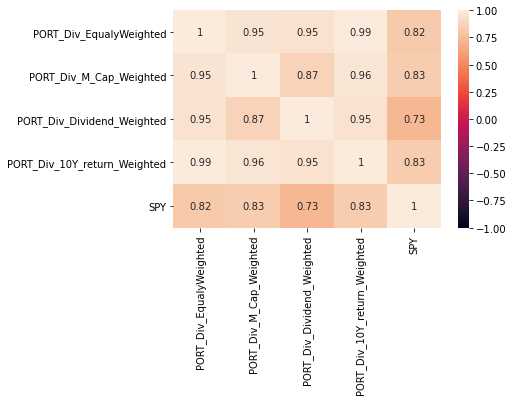

In [136]:
# Using 'heatmap` function to visualize correlations
sns.heatmap(correlation_diver, vmin=-1, vmax=1, annot=True);

#### Answer:  The portfolio that mimic the S&P 500 behavior  is __Algo_2, followed by SFM_LLC

### **Calculate and Plot Beta for a chosen portfolio and the S&P 500**
#### I choose portfolio Algo_1

In [138]:
# Calculate covariance of a single portfolio

PORT_Div_Dividend_Weighted_cov = combined_div['PORT_Div_Dividend_Weighted'].cov(combined_div['SPY'])

print(f"PORT_Div_Dividend_Weighted_cov = {PORT_Div_Dividend_Weighted_cov}")

PORT_Div_Dividend_Weighted_cov = 9.377142663777129e-05


In [139]:
# Calculate variance of S&P 500

spy_variance = combined_div['SPY'].var()

print(f"SPY Variance = {spy_variance}")

SPY Variance = 8.602654314896833e-05


In [141]:
# Computing beta
# Calculating beta of all daily returns of Algo 1

PORT_Div_Dividend_Weighted_beta = PORT_Div_Dividend_Weighted_cov / spy_variance

print(f"PORT_Div_Dividend_Weighted_beta = {PORT_Div_Dividend_Weighted_beta}")

PORT_Div_Dividend_Weighted_beta = 1.090028998089479


### **Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500**

#### I choose Portfolio Algo_1

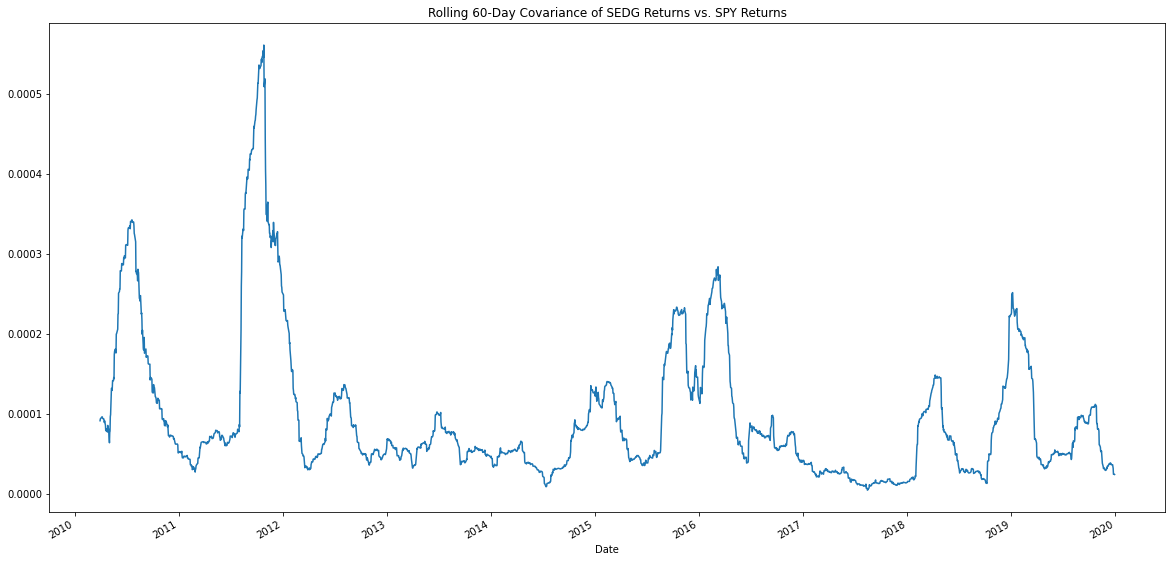

In [142]:
# Calculate 30-day rolling covariance of Algo 1 vs. S&P 500 and plot the data
rolling_covariance_60_div = combined_div['PORT_Div_Dividend_Weighted'].rolling(window=60).cov(combined_RE['SPY'])
rolling_covariance_60_div.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of SEDG Returns vs. SPY Returns');

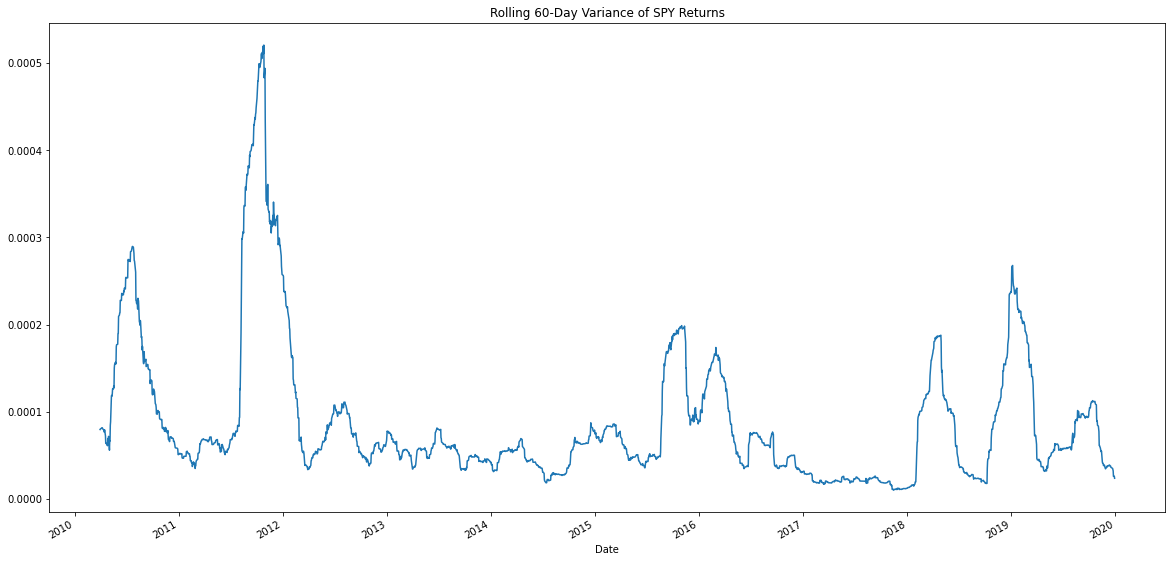

In [143]:
# Calculate 30-day rolling variance of Algo 1 vs. S&P 500 and plot the data
rolling_variance_60_div = combined_div['SPY'].rolling(window=60).var()
rolling_variance_60_div.plot(figsize=(20, 10), title='Rolling 60-Day Variance of SPY Returns');

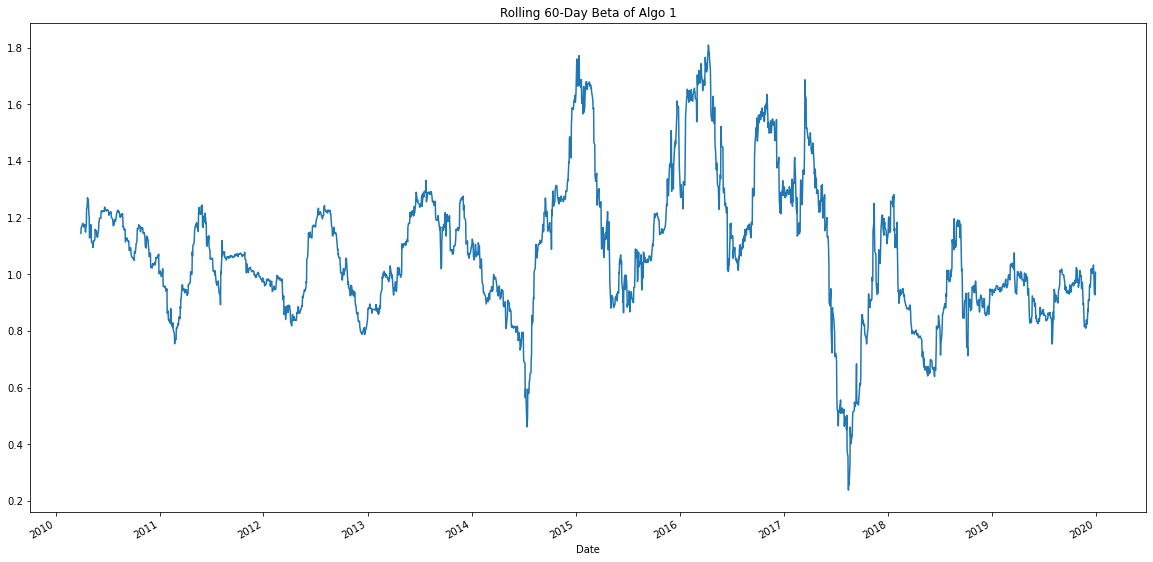

In [144]:
# Calculate 30-day rolling beta of Algo 1 and plot the data
rolling_beta_60_div = rolling_covariance_60_div / rolling_variance_60_div
rolling_beta_60_div.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1');

### In the Rolling 60-Day Beta of Algo_1 vs S&P 500 we can see how disperse are Algo_1 data is from S&P500 data. Algo_1 has a high volatility and does not follow the Market(S&P 500) 

## **Rolling Statistics Challenge: Exponentially Weighted Average**

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

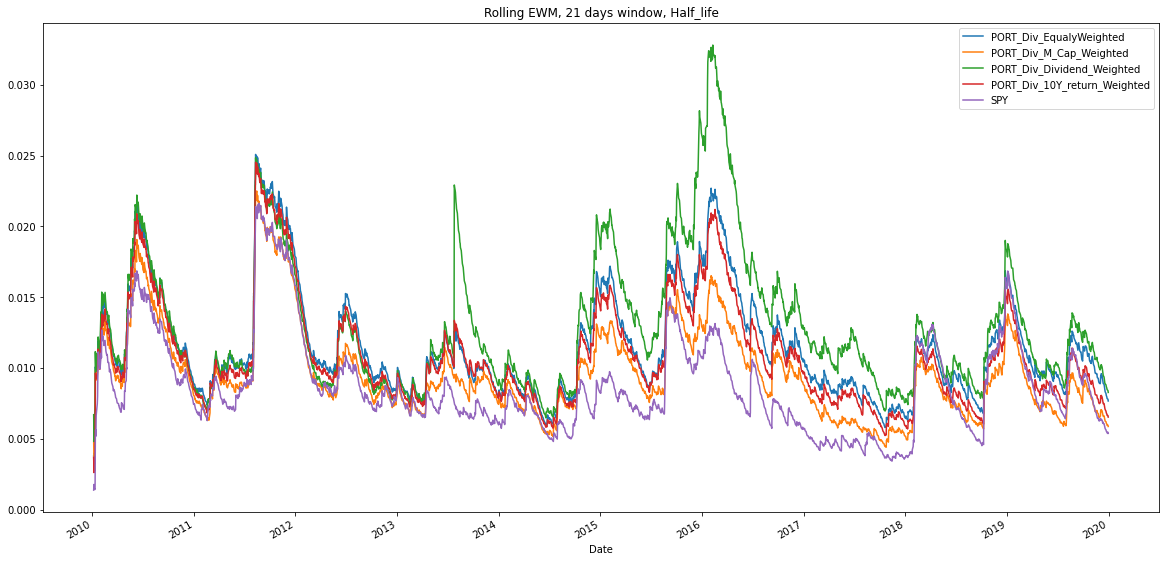

In [145]:
# Use `ewm` to calculate the rolling window
# https://www.statology.org/exponential-moving-average-pandas/

combined_div.ewm(halflife=21).std().plot(figsize=(20,10), title='Rolling EWM, 21 days window, Half_life');

#### This Rolling EWN Plot also corraborate the high volatility for TGM_LLC and BH__Inc and the lowest volatility for P_&_Co_Inc

---

# **Sharpe Ratios**


### **Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot**

In [146]:
# Annualized Sharpe Ratios

sharpe_ratios_div = (combined_div.mean()*252) / (combined_div.std()*np.sqrt(252))
sharpe_ratios_div

PORT_Div_EqualyWeighted         0.781813
PORT_Div_M_Cap_Weighted         0.943352
PORT_Div_Dividend_Weighted      0.699648
PORT_Div_10Y_return_Weighted    0.869863
SPY                             0.784263
dtype: float64

In [147]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios_div.sort_values(inplace = True)
sharpe_ratios_div

PORT_Div_Dividend_Weighted      0.699648
PORT_Div_EqualyWeighted         0.781813
SPY                             0.784263
PORT_Div_10Y_return_Weighted    0.869863
PORT_Div_M_Cap_Weighted         0.943352
dtype: float64

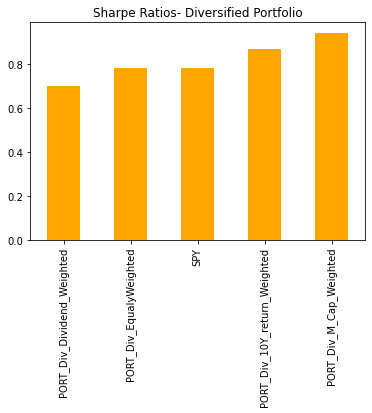

In [148]:
sharpe_ratios_div.plot(kind="bar", title="Sharpe Ratios- Diversified Portfolio", color='orange');

---

## Sharpe Ratios 

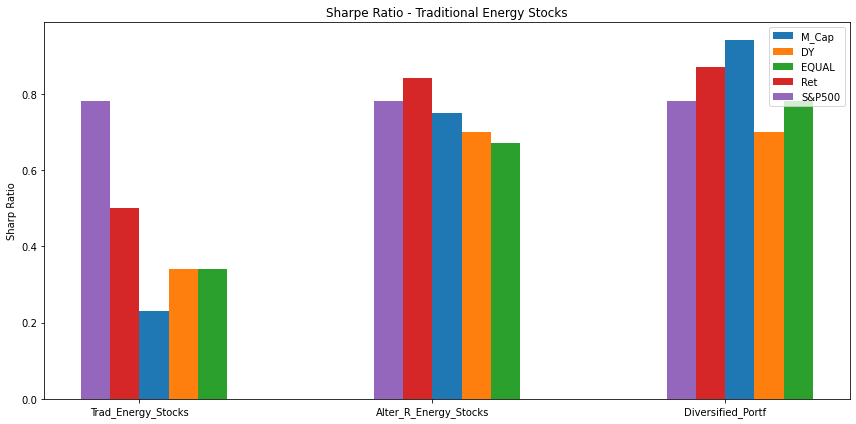

In [59]:

labels = ['Trad_Energy_Stocks', 'Alter_R_Energy_Stocks', 'Diversified_Portf']
Mar_Cap =[0.23,0.75,0.94]
Div_Y=[0.34,0.70,0.70]
Equal=[0.34,0.67,0.78]
Return=[0.5,0.84,0.87]
spy=[0.78,0.78,0.78]
 

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x + width/2,Mar_Cap, width, label='M_Cap') 
rects2 = ax.bar(x + width*1.5, Div_Y, width, label='DY')
rects3 = ax.bar(x + width*2.5, Equal, width, label='EQUAL')
rects4 = ax.bar(x - width/2, Return, width, label='Ret')
rects5 = ax.bar(x - width*1.5, spy, width, label='S&P500')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sharp Ratio')
ax.set_title('Sharpe Ratio - Traditional Energy Stocks')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

### Comparing the portfolios volatility, Betas correlation and Sharpe Ratios, only one Portfolio shows better performance than S&P500, concluding that the Data Analysis reflect the best risk/reward opportunity to invest is the Diversified Energy Stocks Portfolio.